Importing required libraries

In [563]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [564]:
df1=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/zomato.csv', encoding='ISO-8859-1')

Imported the zomato dataset from given github link with using the encoding correction code "encoding='ISO-8859-1'" as it was giving error of "utf-8" to download.

In [565]:
df1

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [566]:
df2=pd.read_excel('Country-Code.xlsx')

Uploaded the Country-Code excel file in local Jupyter Notebook and imported from there to our Data Frame.

In [567]:
df2

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [568]:
df=pd.merge(df1,df2)

Merging both Data Frame df1 & df2 for Country Name

In [569]:
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [570]:
df1.shape

(9551, 21)

In [571]:
df2.shape

(15, 2)

In [572]:
df.shape

(9551, 22)

In [573]:
df1.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [574]:
df2.columns

Index(['Country Code', 'Country'], dtype='object')

In [575]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [576]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Only Cuisines is having 9 missing values, so we are going to simply drop those rows, because replace the same by Mode would not be appropriate here due to one country's Restaurant cuisines might not be of another country's Restaurant cuisines.

In [577]:
dfd=df.dropna()

In [578]:
dfd.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [579]:
dfd.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

The data types are of object, integer & float data types

We are going to convert the object data types to numeric values for our further process.

In [580]:
le=sklearn.preprocessing.LabelEncoder()

In [581]:
for c in dfd.select_dtypes(include="object").columns:
    dfd[c]=le.fit_transform(dfd[c].astype(str))

In [582]:
dfd.dtypes

Restaurant ID             int64
Restaurant Name           int32
Country Code              int64
City                      int32
Address                   int32
Locality                  int32
Locality Verbose          int32
Longitude               float64
Latitude                float64
Cuisines                  int32
Average Cost for two      int64
Currency                  int32
Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Switch to order menu      int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
Country                   int32
dtype: object

Now we are going to do some non graphical and graphical analysis on our dfd dataset.

In [583]:
dfcor=dfd.corr()
dfcor

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
Restaurant ID,1.000000,0.004130,0.146270,-0.004876,0.081732,0.070047,0.070626,-0.224362,-0.052626,-0.079240,...,-0.109794,-0.084615,0.012606,NaN,-0.134528,-0.327160,0.130650,0.251444,-0.147434,0.159514
Restaurant Name,0.004130,1.000000,0.020584,-0.001969,0.000623,0.003962,0.003915,-0.002419,0.010054,0.051729,...,0.041148,0.028024,0.011992,NaN,0.061676,0.029483,-0.007377,0.012139,0.018523,0.018191
Country Code,0.146270,0.020584,1.000000,-0.178454,-0.217947,-0.119186,-0.116678,-0.694629,0.018049,-0.135727,...,-0.060815,-0.153581,-0.018199,NaN,0.245363,0.281295,-0.188500,0.224510,0.154361,0.968367
City,-0.004876,-0.001969,-0.178454,1.000000,-0.020604,0.094836,0.091571,0.114510,-0.004607,0.026584,...,-0.004039,0.011926,-0.014005,NaN,-0.104848,-0.130848,0.111089,-0.099135,-0.078513,-0.177879
Address,0.081732,0.000623,-0.217947,-0.020604,1.000000,0.159404,0.160363,0.183177,-0.037977,0.024633,...,0.006036,0.029268,0.031224,NaN,-0.035257,-0.150458,0.071442,-0.008190,-0.101536,-0.233418
Locality,0.070047,0.003962,-0.119186,0.094836,0.159404,1.000000,0.999463,0.085267,-0.020191,0.007256,...,-0.065775,-0.031275,-0.007338,NaN,-0.115026,-0.174248,0.037044,-0.037768,-0.124193,-0.117860
Locality Verbose,0.070626,0.003915,-0.116678,0.091571,0.160363,0.999463,1.000000,0.083185,-0.020678,0.006213,...,-0.065307,-0.032044,-0.007391,NaN,-0.112868,-0.173171,0.037310,-0.036226,-0.123503,-0.115510
Longitude,-0.224362,-0.002419,-0.694629,0.114510,0.183177,0.085267,0.083185,1.000000,0.045415,0.129325,...,0.099860,0.177922,0.018703,NaN,-0.080257,-0.114733,0.060153,-0.183417,-0.084371,-0.763055
Latitude,-0.052626,0.010054,0.018049,-0.004607,-0.037977,-0.020191,-0.020678,0.045415,1.000000,0.037841,...,0.054874,0.119087,0.015037,NaN,-0.166735,0.000197,0.042406,-0.129332,-0.022914,0.180572
Cuisines,-0.079240,0.051729,-0.135727,0.026584,0.024633,0.007256,0.006213,0.129325,0.037841,1.000000,...,0.050867,-0.016303,0.007809,NaN,-0.005265,-0.080832,-0.016261,-0.079944,-0.032935,-0.131155


<AxesSubplot:>

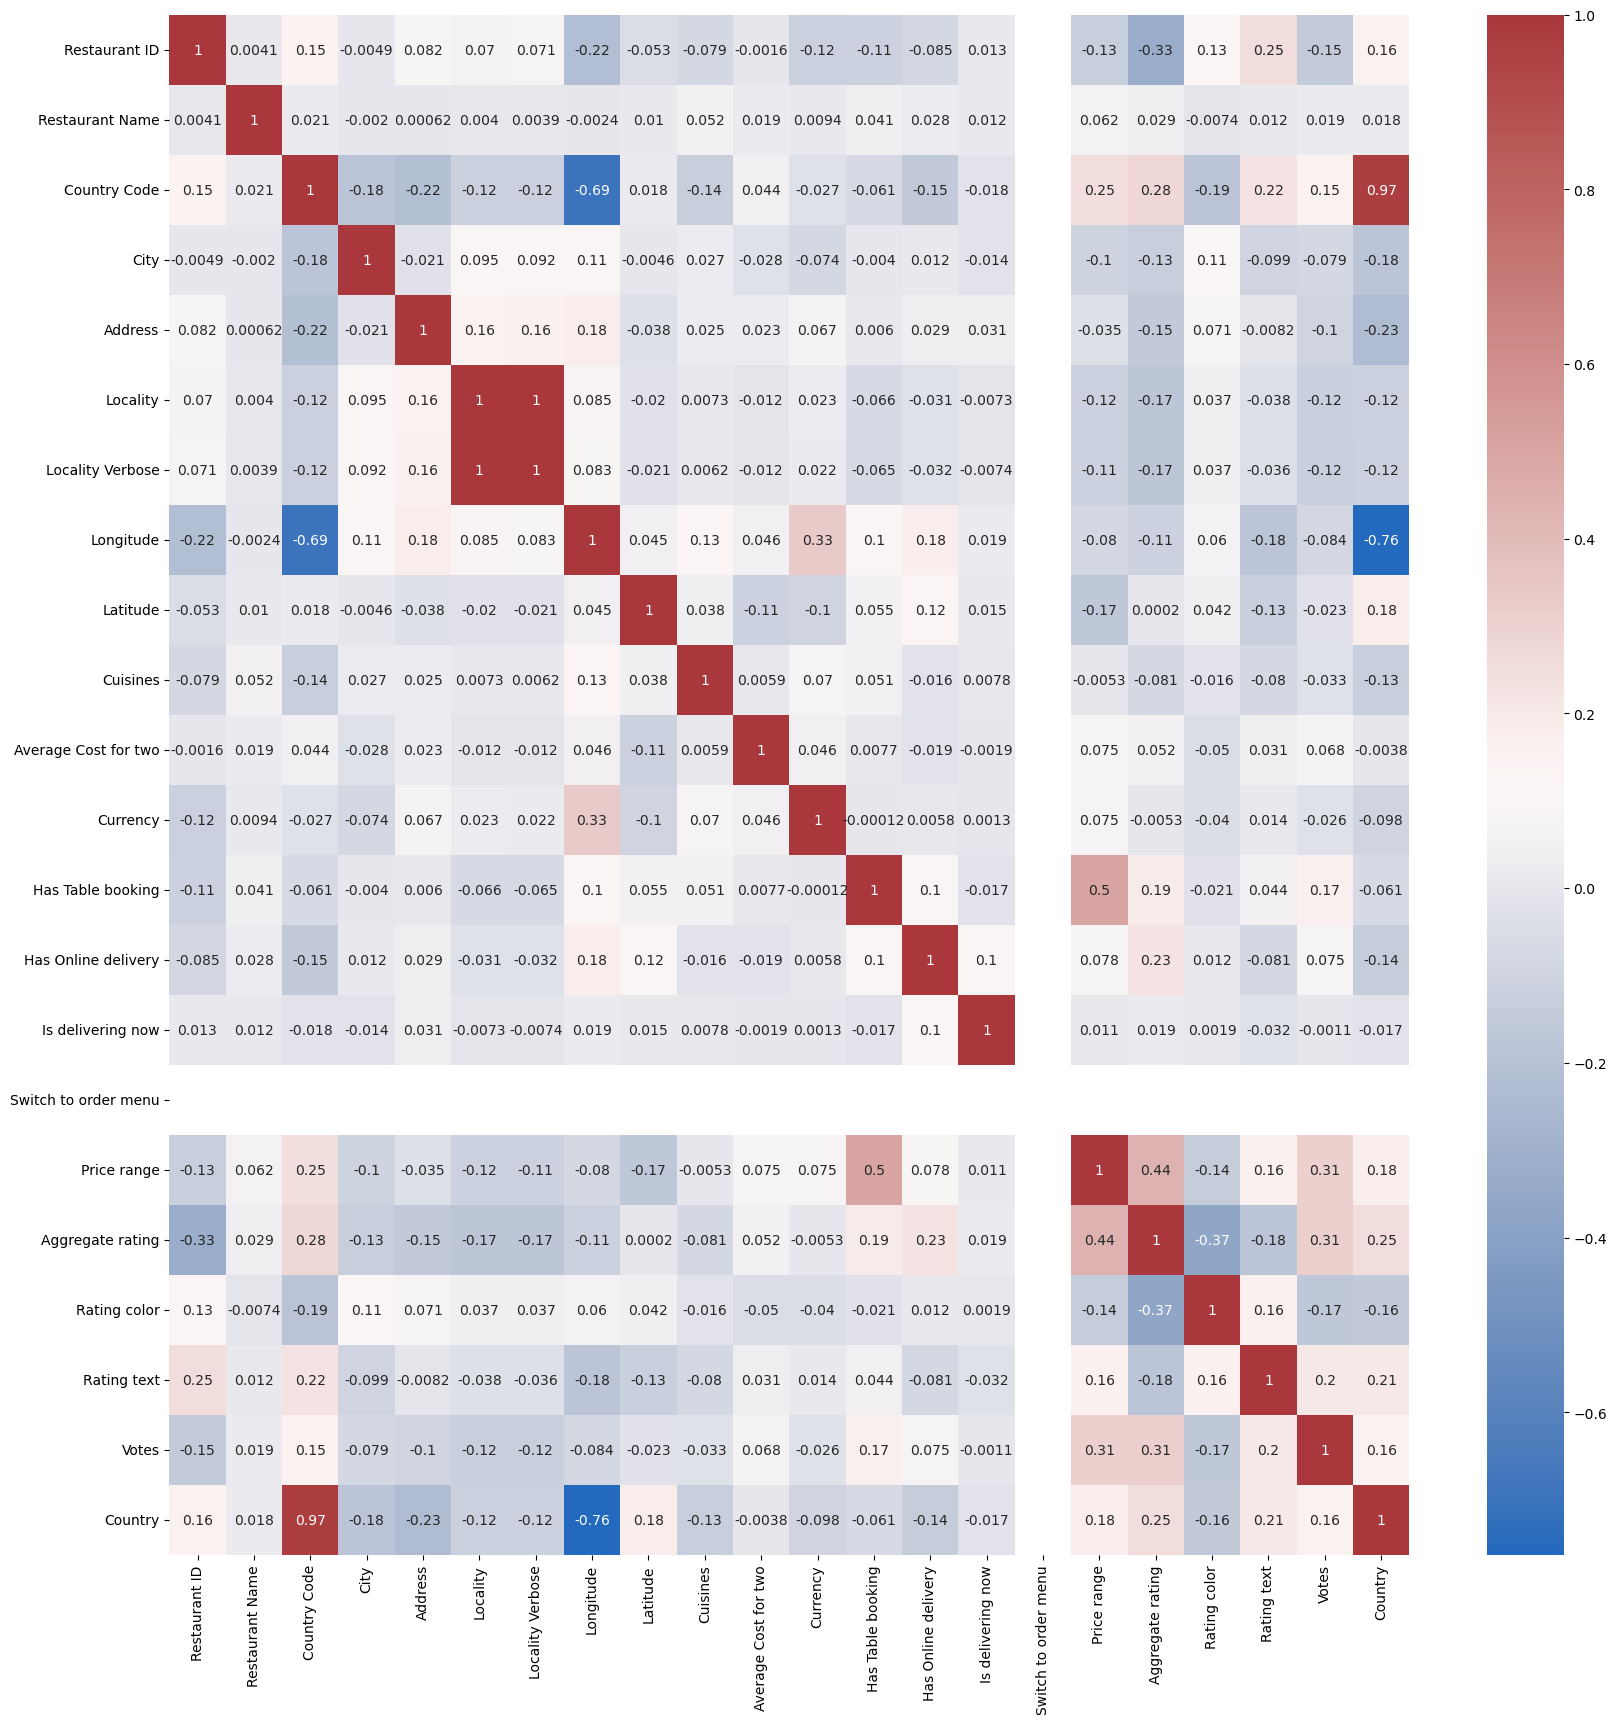

In [584]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True,cmap='vlag')

By above corelation data and heatmap, we found that the 'Switch to order menu' feature has no corelation with any other columns of the dataset, so we are going to drop this column.

In [585]:
dfd.drop(['Switch to order menu'], axis=1, inplace=True)

In [586]:
dfd.describe()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
count,9.542000e+03,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,...,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000,9542.000000
mean,9.043301e+06,3648.654265,18.179208,77.570530,4538.486166,657.080277,676.259694,64.274997,25.848532,989.163173,...,3.979564,0.121358,0.256864,0.003563,1.804968,2.665238,2.952840,1.788933,156.772060,3.727101
std,8.791967e+06,2140.178731,56.451600,22.781307,2563.438975,314.889244,330.752100,41.197602,11.010094,514.326600,...,0.912652,0.326560,0.436927,0.059589,0.905563,1.516588,1.492629,1.694795,430.203324,2.634405
min,5.300000e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-157.948486,-41.330428,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.019312e+05,1775.250000,1.000000,78.250000,2321.250000,381.000000,387.000000,77.081565,28.478658,497.000000,...,4.000000,0.000000,0.000000,0.000000,1.000000,2.500000,2.000000,0.000000,5.000000,3.000000
50%,6.002726e+06,3590.500000,1.000000,87.000000,4606.500000,694.000000,705.000000,77.192031,28.570444,1126.000000,...,4.000000,0.000000,0.000000,0.000000,2.000000,3.200000,2.000000,2.000000,31.000000,3.000000
75%,1.835260e+07,5478.750000,1.000000,87.000000,6740.750000,919.000000,951.000000,77.282043,28.642711,1354.000000,...,4.000000,0.000000,1.000000,0.000000,2.000000,3.700000,4.000000,3.000000,130.000000,3.000000
max,1.850065e+07,7436.000000,216.000000,139.000000,8909.000000,1205.000000,1262.000000,174.832089,55.976980,1824.000000,...,11.000000,1.000000,1.000000,1.000000,4.000000,4.900000,5.000000,5.000000,10934.000000,14.000000


There are differences between Min & 25% and Max & 75% in some columns, so outliers possibilites are there.

Restaurant ID              AxesSubplot(0.125,0.653529;0.0824468x0.226471)
Restaurant Name         AxesSubplot(0.223936,0.653529;0.0824468x0.226471)
Country Code            AxesSubplot(0.322872,0.653529;0.0824468x0.226471)
City                    AxesSubplot(0.421809,0.653529;0.0824468x0.226471)
Address                 AxesSubplot(0.520745,0.653529;0.0824468x0.226471)
Locality                AxesSubplot(0.619681,0.653529;0.0824468x0.226471)
Locality Verbose        AxesSubplot(0.718617,0.653529;0.0824468x0.226471)
Longitude               AxesSubplot(0.817553,0.653529;0.0824468x0.226471)
Latitude                   AxesSubplot(0.125,0.381765;0.0824468x0.226471)
Cuisines                AxesSubplot(0.223936,0.381765;0.0824468x0.226471)
Average Cost for two    AxesSubplot(0.322872,0.381765;0.0824468x0.226471)
Currency                AxesSubplot(0.421809,0.381765;0.0824468x0.226471)
Has Table booking       AxesSubplot(0.520745,0.381765;0.0824468x0.226471)
Has Online delivery     AxesSubplot(0.

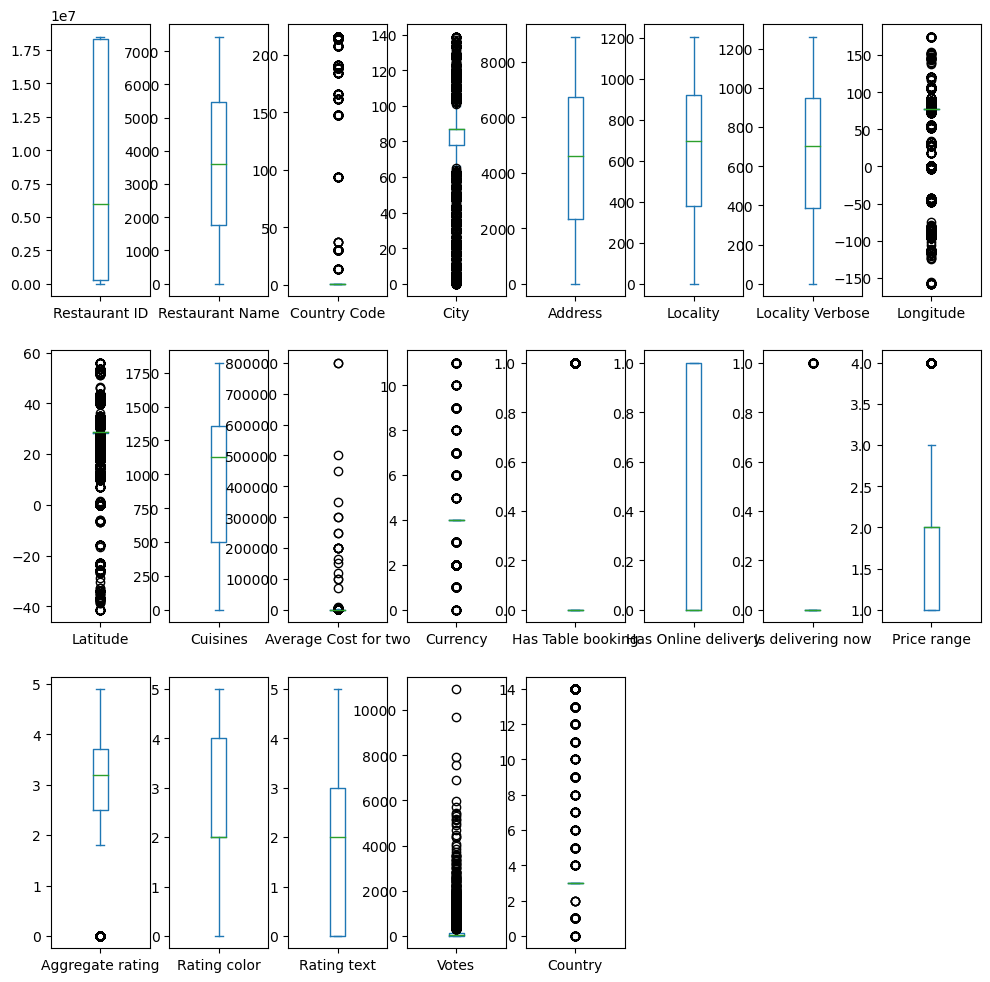

In [587]:
dfd.plot(kind='box',figsize=(12,12),layout=(3,8),subplots=True)

By above boxplot, we found some outliers in the dataset, so trying to reduce some outliers by using zscore method.

In [588]:
z=np.abs(zscore(dfd))
z

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,0.310034,0.044085,2.547817,0.200637,1.614523,1.543736,1.524665,1.377641,1.024849,0.134480,...,4.360670,2.690738,0.58792,0.059799,1.319726,1.407683,1.978385,0.465528,0.365493,0.862820
1,0.311552,0.224598,2.547817,0.200637,0.588504,0.206688,0.230577,1.377315,1.025915,0.236899,...,4.360670,2.690738,0.58792,0.059799,1.319726,1.209860,1.978385,0.465528,1.009408,0.862820
2,0.312040,0.353098,2.547817,0.112841,0.053647,1.108639,1.095318,1.378352,1.023399,1.325758,...,4.360670,2.690738,0.58792,0.059799,2.424069,1.143919,1.308391,1.894763,0.263210,0.862820
3,0.309935,0.491268,2.547817,0.112841,1.616473,0.644450,0.594858,1.378344,1.023043,0.266064,...,4.360670,0.371645,0.58792,0.059799,2.424069,1.473624,1.978385,0.465528,0.484048,0.862820
4,0.310413,0.872097,2.547817,0.112841,1.616083,0.644450,0.594858,1.378369,1.023122,0.258287,...,4.360670,2.690738,0.58792,0.059799,2.424069,1.407683,1.978385,0.465528,0.167901,0.862820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,0.355749,0.367907,3.362717,2.696627,0.538178,0.448055,0.466415,0.856833,1.378286,1.601862,...,7.692753,0.371645,0.58792,0.059799,1.319726,0.946096,1.308391,1.894763,1.467355,2.760882
9547,0.356543,1.092328,3.362717,2.696627,0.552222,0.336899,0.360590,0.855281,1.377110,1.623250,...,7.692753,0.371645,0.58792,0.059799,1.319726,1.012037,1.308391,1.894763,2.039208,2.760882
9548,0.355740,0.273194,3.362717,2.696627,0.553783,0.330547,0.351519,0.855443,1.381285,0.234954,...,7.692753,0.371645,0.58792,0.059799,2.424069,0.682332,1.371585,0.124545,1.172130,2.760882
9549,0.355706,1.465213,3.362717,2.696627,0.554173,0.330547,0.351519,0.855410,1.381482,1.298536,...,7.692753,0.371645,0.58792,0.059799,2.424069,0.880155,1.308391,1.894763,1.730035,2.760882


In [589]:
cleaned_df=dfd[(z<3).all(axis=1)]
cleaned_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
544,18483372,5889,184,117,123,106,107,103.860005,1.282661,515,...,2,0,0,0,4,3.4,2,0,34,8
545,18484349,1827,184,117,1065,107,108,103.859422,1.285477,102,...,2,0,0,0,4,4.0,1,5,33,8
546,18496057,5311,184,117,2203,159,160,103.840360,1.279420,922,...,2,0,0,0,4,3.8,5,2,33,8
547,18483389,4998,184,117,1981,188,189,103.841669,1.280503,6,...,2,0,0,0,4,3.1,2,0,34,8
548,18483222,3184,184,117,1068,200,201,103.853605,1.293221,916,...,2,0,0,0,4,3.8,5,2,35,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9271,2800100,1832,1,133,3877,869,882,83.361377,17.764287,748,...,4,0,0,0,2,3.6,5,2,193,3
9272,2800418,3358,1,133,7058,992,1045,0.000000,0.000000,465,...,4,0,0,0,2,3.7,5,2,85,3
9273,2800881,4980,1,133,7001,992,1045,83.315281,17.719539,322,...,4,0,0,0,2,4.3,1,5,172,3
9274,2800042,7192,1,133,8656,1079,1132,83.336840,17.721182,88,...,4,0,0,0,4,3.8,5,2,74,3


In [590]:
df.shape

(9551, 22)

In [591]:
dfd.shape

(9542, 21)

In [592]:
cleaned_df.shape

(8407, 21)

After cleaning the data by zsocre method, we have lost approximately 12% of data, which should be maximum upto 10%, but as per our opinion, now it is ok because of the large number of rows in this dataset.

In [593]:
cleaned_df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

Restaurant ID              AxesSubplot(0.125,0.653529;0.0824468x0.226471)
Restaurant Name         AxesSubplot(0.223936,0.653529;0.0824468x0.226471)
Country Code            AxesSubplot(0.322872,0.653529;0.0824468x0.226471)
City                    AxesSubplot(0.421809,0.653529;0.0824468x0.226471)
Address                 AxesSubplot(0.520745,0.653529;0.0824468x0.226471)
Locality                AxesSubplot(0.619681,0.653529;0.0824468x0.226471)
Locality Verbose        AxesSubplot(0.718617,0.653529;0.0824468x0.226471)
Longitude               AxesSubplot(0.817553,0.653529;0.0824468x0.226471)
Latitude                   AxesSubplot(0.125,0.381765;0.0824468x0.226471)
Cuisines                AxesSubplot(0.223936,0.381765;0.0824468x0.226471)
Average Cost for two    AxesSubplot(0.322872,0.381765;0.0824468x0.226471)
Currency                AxesSubplot(0.421809,0.381765;0.0824468x0.226471)
Has Table booking       AxesSubplot(0.520745,0.381765;0.0824468x0.226471)
Has Online delivery     AxesSubplot(0.

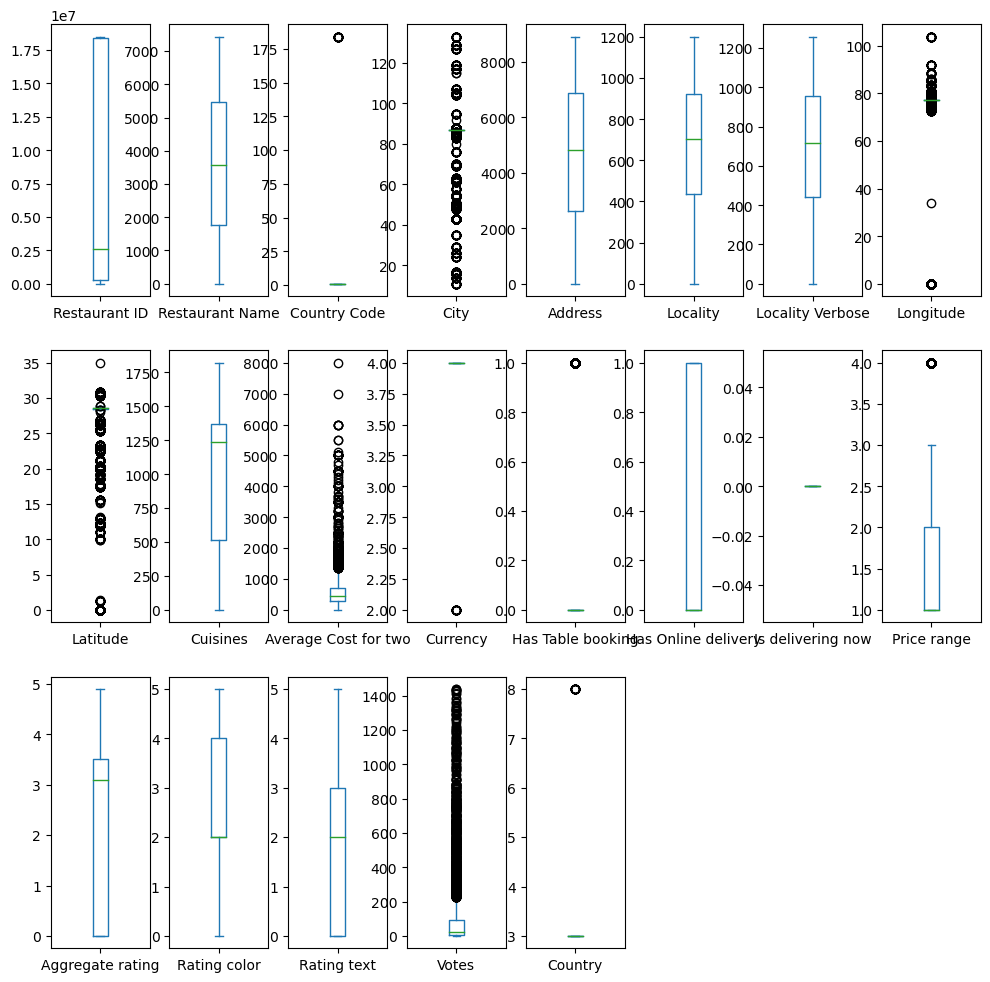

In [594]:
cleaned_df.plot(kind='box',figsize=(12,12),layout=(3,8),subplots=True)

In [595]:
cleaned_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
544,18483372,5889,184,117,123,106,107,103.860005,1.282661,515,...,2,0,0,0,4,3.4,2,0,34,8
545,18484349,1827,184,117,1065,107,108,103.859422,1.285477,102,...,2,0,0,0,4,4.0,1,5,33,8


In [596]:
cleaned_df['Average Cost for two']

544      300
545      270
546      500
547       80
548      430
        ... 
9271     600
9272     400
9273     600
9274    1500
9275    1400
Name: Average Cost for two, Length: 8407, dtype: int64

In [597]:
cleaned_df['Price range']

544     4
545     4
546     4
547     4
548     4
       ..
9271    2
9272    2
9273    2
9274    4
9275    3
Name: Price range, Length: 8407, dtype: int64

As we have to predict 2 things (1) Average Cost for two, which is Regression type prediction and (2) Price Range, which is classification type of prediction as per our observation. So first we are saving our dfd in 2 different variables to working for 2 diffrent Targets.

In [598]:
rdf=pd.DataFrame(cleaned_df)

In [599]:
cdf=pd.DataFrame(cleaned_df)

Now we are shifting our 1st Target for the Regression Model at the very last column.

In [600]:
Target1=rdf.pop('Average Cost for two')

In [601]:
rdf.shape

(8407, 20)

In [602]:
rdf.insert(20,'Average Cost for two',Target1)

In [603]:
rdf.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Average Cost for two
6233,18363074,317,1,87,4831,792,803,77.135528,28.70854,1306,...,0,0,0,1,3.1,2,0,4,3,100


Separating the independent & target variables for our regression model

In [604]:
rx=rdf.iloc[:,0:-1]

In [605]:
ry=rdf.iloc[:,-1]

In [606]:
rx.shape

(8407, 20)

In [607]:
ry.shape

(8407,)

Applying diffrent Regression Algorithms with many random states.

In [608]:
lr=LinearRegression()

In [609]:
for i in range(0,50):
    rxtrain,rxtest,rytrain,rytest=train_test_split(rx,ry,test_size=0.30,random_state=i)
    lr.fit(rxtrain,rytrain)
    apred=lr.predict(rxtest)
    rscore=r2_score(rytest,apred)
    print(rscore)

0.7047233032333339
0.7173399669682065
0.7367216330269484
0.7692745908098847
0.7333243454858808
0.7438935319176087
0.7396681032918522
0.7466206470591462
0.7801915067362049
0.7346485462999606
0.7293865223607854
0.772149975333797
0.7424750964889202
0.7377150160515715
0.7715949328768459
0.7091676999969696
0.7612162843835437
0.7250174023843114
0.7277970836826172
0.7391590118531186
0.7223143962481624
0.7231678784897265
0.7223072093616658
0.7665120035919036
0.7209757167532251
0.7105117848524454
0.7387336966282735
0.7414223832870837
0.7452169297676603
0.7297201091275602
0.7071437896403743
0.7484751682754203
0.7300346291080027
0.7311997384380147
0.7498470266878551
0.7492695520754262
0.762872224336848
0.7378402758814641
0.7458180947966965
0.7195244856616058
0.7436503424182844
0.7579237248833065
0.7148279724071366
0.7305851632215874
0.7739788199317944
0.7314070134567423
0.7727602863926649
0.7643039049443421
0.7107117312249285
0.7641127760909169


In [610]:
dr=DecisionTreeRegressor()

In [611]:
for i in range(0,50):
    rxtrain,rxtest,rytrain,rytest=train_test_split(rx,ry,test_size=0.30,random_state=i)
    dr.fit(rxtrain,rytrain)
    apred=dr.predict(rxtest)
    rscore=r2_score(rytest,apred)
    print(rscore)

0.7453123271045057
0.7683115107087841
0.7426137345874391
0.776131979350809
0.78842433872837
0.7621661918742082
0.6973476399750057
0.7197924394721208
0.7057504451379115
0.7835666581354735
0.7632838523236751
0.7257928896523389
0.8046096561724984
0.6656624265360469
0.720948861383598
0.8094060344992563
0.733162216684297
0.7270534236532656
0.7356454798525114
0.7194622004425644
0.7668955995878486
0.7255056504209132
0.770990155355812
0.7400237983004687
0.7709642074831773
0.7864634828591744
0.8093845304523081
0.7713251886770006
0.8186420492780178
0.7703729088695237
0.8005677484411793
0.7460077447818187
0.809709942931194
0.7813038006650501
0.7286991686628841
0.7533273065396904
0.7912149145758419
0.7156874462526484
0.7400622290390162
0.7808299870138518
0.704046654242492
0.6124293853586256
0.7441962822082051
0.7627124284844548
0.7449692199169529
0.7724235959649676
0.7658474709554861
0.7845255994743962
0.7417375388187211
0.7985917712160642


In [612]:
br=BayesianRidge()

In [613]:
for i in range(0,50):
    rxtrain,rxtest,rytrain,rytest=train_test_split(rx,ry,test_size=0.30,random_state=i)
    br.fit(rxtrain,rytrain)
    apred=br.predict(rxtest)
    rscore=r2_score(rytest,apred)
    print(rscore)

0.7047061599584223
0.7172918449815493
0.7366466002232125
0.7694146852604238
0.7333512617515128
0.7437792668782164
0.7397048175825935
0.7466158164459691
0.7802735465215412
0.7346980033592834
0.7293350107843859
0.772148353068894
0.7424891805448607
0.7378641904178815
0.7717013421855535
0.7091347353055035
0.7611961934901359
0.7249744153922637
0.7277689688603081
0.7392732901200398
0.7222414185858664
0.7233149093565505
0.7222148140553749
0.7665592736052887
0.7210777813603808
0.7105361107987129
0.7387512172614388
0.7415093098870269
0.7452237987803065
0.7297500477734966
0.707083052996321
0.7484005745972995
0.7300242815969982
0.7313092003827508
0.7498562031834035
0.7493139033810843
0.7628136421419909
0.7379000405781335
0.7458145753839025
0.7195229516716357
0.7436957599437797
0.7579085419270786
0.7147806383513613
0.7305516675966552
0.7741813085285968
0.7313587432587961
0.772750630480978
0.7643893218766249
0.7107312761792565
0.7643884357410777


In [614]:
gb=GradientBoostingRegressor()

In [615]:
for i in range(0,50):
    rxtrain,rxtest,rytrain,rytest=train_test_split(rx,ry,test_size=0.30,random_state=i)
    gb.fit(rxtrain,rytrain)
    apred=gb.predict(rxtest)
    rscore=r2_score(rytest,apred)
    print(rscore)

0.8403651982350357
0.8693926437711641
0.8690262300378555
0.8970491070019622
0.8686369265424908
0.880991833751029
0.8804061524400206
0.859217882609249
0.8574439391535196
0.873999919214244
0.858239638991837
0.8821253321327422
0.8856130221990529
0.8514629666590379
0.8930686115267363
0.8574357428063324
0.8824845086687934
0.8751553339933911
0.8675992602971023
0.8594564955249969
0.8538680230867295
0.860555036044034
0.8571468113857237
0.8867961654715235
0.8746439515209131
0.8477034869905744
0.8925693200138987
0.8709121519410041
0.883106406921886
0.8723646336401716
0.842270581682615
0.8961960214692829
0.8717306709023784
0.8630116275156846
0.87478707538266
0.8794930332835191
0.8631001099597839
0.8661161232835728
0.8619087308213598
0.8569144297886054
0.875165341353302
0.8834022394753837
0.8477499221365756
0.8819149242450787
0.885473759206677
0.8765597260678617
0.8806169798462459
0.8626029658434894
0.8567150298768127
0.8899277292583017


In [616]:
ab=AdaBoostRegressor()

In [617]:
for i in range(0,50):
    rxtrain,rxtest,rytrain,rytest=train_test_split(rx,ry,test_size=0.30,random_state=i)
    ab.fit(rxtrain,rytrain)
    apred=ab.predict(rxtest)
    rscore=r2_score(rytest,apred)
    print(rscore)

0.7969095196354107
0.8407487935318727
0.8277419975797433
0.8407677682151742
0.8072740461066834
0.820919953231849
0.8374538444492574
0.8137085291345606
0.7836112220515344
0.7760562004610047
0.8102309046640599
0.8218762208186822
0.8431779379771224
0.7691400809680563
0.8565095562905911
0.8136751351807141
0.8419983667611117
0.8053674234375477
0.8442360322084421
0.8096628746556829
0.8437163209265754
0.746713580121533
0.8313455572294336
0.8174696594948183
0.7969050110902011
0.8221960582518113
0.8469080342042132
0.8211032091114714
0.8360658232084893
0.8265044650316625
0.8196916327940614
0.8552438231433802
0.8243266624656782
0.8005262109989367
0.8404985564041633
0.8121064104531031
0.8196867794428796
0.8239238742849923
0.7983247519597316
0.8250977023192194
0.8086903981605831
0.8059189366671333
0.8184406606389381
0.7887552299567545
0.8121597044190507
0.8308140614230631
0.8220441405212484
0.7423636455842046
0.8297170679715915
0.8007675832925124


In [618]:
fr=RandomForestRegressor()

In [619]:
for i in range(0,50):
    rxtrain,rxtest,rytrain,rytest=train_test_split(rx,ry,test_size=0.30,random_state=i)
    fr.fit(rxtrain,rytrain)
    apred=fr.predict(rxtest)
    rscore=r2_score(rytest,apred)
    print(rscore)

0.839914231285976
0.8722615775725081
0.8767145023795123
0.8882595571259815
0.874394386877362
0.8920203613474638
0.8779969441201623
0.8661489084787926
0.8496736305032149
0.8745069933359472
0.8630806636327333
0.8813670899174961
0.8874144307488585
0.8577149622692657
0.9036174947735147
0.8704015049861652
0.8730893695355495
0.8638158961106202
0.8689305144867475
0.8698680419748052
0.8612946386670861
0.8647366479828085
0.8684988265313366
0.8784661990399305
0.8790129487280216
0.8626185527243595
0.9029400437359643
0.8505260999455561
0.8702601882809093
0.8725216285389915
0.8528835101369844
0.8895336215782126
0.8685659836605616
0.8635711849929792
0.8716600060181177
0.8729711835287177
0.8790137436081091
0.8701068931445776
0.8735157324278228
0.855367840497328
0.8661558412405526
0.8783590437382908
0.8402139764904346
0.8909258323276315
0.8787957180994118
0.8645420874612992
0.8757512729364306
0.8656053916112922
0.8680886213633259
0.8973306158696351


After using above Regression Algorithms, we found Gradient Boosting Regressor and Random Forest Regressor as good ones for the predictions. And between these two the Random Forest Regressor is better as per our observation. So we are going to check this this Algo with cross validation and hyperparameter tuning methods.

In [620]:
cv1=cross_val_score(fr,rx,ry,cv=KFold(n_splits=10))

In [621]:
cv1

array([0.65656234, 0.82014612, 0.87868911, 0.81831934, 0.84896824,
       0.87249063, 0.92752292, 0.82476289, 0.89040566, 0.85045131])

In [622]:
cv1.mean()

0.838831856459041

In [623]:
cv2=cross_val_score(fr,rx,ry,cv=StratifiedKFold(n_splits=10))

In [624]:
cv2

array([0.77042363, 0.87888463, 0.85676175, 0.88625074, 0.83420809,
       0.85601448, 0.93034065, 0.88888661, 0.78842764, 0.89834057])

In [625]:
cv2.mean()

0.8588538800228738

In [626]:
cv3=cross_val_score(fr,rx,ry,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=10))

In [627]:
cv3

array([0.89523011, 0.90113129, 0.86822795, 0.8562251 , 0.90550092,
       0.87942474, 0.8783316 , 0.87296724, 0.89126046, 0.87309055])

In [628]:
cv3.mean()

0.8821389956194274

By using the above cross validation methods, we are getting the good prediction accuracy from 83% to 88%.

In [629]:
gs1=GridSearchCV(estimator=fr,param_grid={'n_estimators':[200,300],'max_depth':[None],'max_features':[4,5],'min_samples_split':[6],'warm_start':[False,True],'oob_score':[True,False]},scoring='accuracy',cv=6,n_jobs=-1)

In [630]:
gs1.fit(rxtrain,rytrain)

GridSearchCV(cv=6, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None], 'max_features': [4, 5],
                         'min_samples_split': [6], 'n_estimators': [200, 300],
                         'oob_score': [True, False],
                         'warm_start': [False, True]},
             scoring='accuracy')

In [631]:
HyPred1=gs1.best_estimator_.predict(rxtest)

In [632]:
r2_score(rytest,HyPred1)

0.8990871222278569

By applying our Random Forest Regressor via Hyperparameter Tuning we are getting a very good prediction accuracy of approximately 90%, so going to save this gs1 for ML Model.

In [633]:
pickle.dump(gs1, open('Average_Cost_2_Persons', 'wb'))

In [634]:
gs1_model=pickle.load(open('Average_Cost_2_Persons', 'rb'))

In [635]:
model_pred1=gs1_model.predict(rxtest)

In [636]:
r2_score(rytest,model_pred1)

0.8990871222278569

We are getting the same approximately 90% accurate prediction with our saved gs1 Machine Learning Model.

Now we are going for the prediction of our 2nd classification Target 2

In [637]:
cdf.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1308,313272,5510,1,50,1166,251,257,77.094829,28.481877,251,...,4,0,0,0,1,2.9,2,0,4,3


In [638]:
Target2=cdf.pop('Price range')

In [639]:
cdf.shape

(8407, 20)

In [640]:
cdf.insert(20,'Price range',Target2)

In [641]:
cdf.sample()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Aggregate rating,Rating color,Rating text,Votes,Country,Price range
5247,6183,2144,1,87,786,654,665,77.293036,28.60434,1329,...,4,0,0,0,2.7,2,0,33,3,2


Shifted our 2nd Target variable at the very last column

Separating the independent & target variables for our 2nd target prediction of classification type.

In [642]:
cx=cdf.iloc[:,0:-1]

In [643]:
cy=cdf.iloc[:,-1]

In [644]:
cx.shape

(8407, 20)

In [645]:
cy.shape

(8407,)

Now going to apply different Classification Algorithms with many random states to get the best one.

In [646]:
lg=LogisticRegression()

In [647]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    lg.fit(cxtrain,cytrain)
    pred=lg.predict(cxtest)
    score=accuracy_score(cytest,pred)
    print(score)

0.5473642489100278
0.5548949663099485
0.5644074514466905
0.5263575108997226
0.558858501783591
0.53824811732065
0.5426080063416567
0.5473642489100278
0.5156559651208878
0.5469678953626635
0.5370590566785572
0.5390408244153785
0.5560840269520412
0.5453824811732065
0.5315101070154578
0.5485533095521204
0.5319064605628221
0.5057471264367817
0.5342845818470076
0.5358699960364646
0.5422116527942925
0.5624256837098692
0.5628220372572335
0.5862068965517241
0.5727308759413396
0.5362663495838288
0.5552913198573127
0.5061434799841459
0.6365437970669837
0.5390408244153785
0.557273087594134
0.5453824811732065
0.5386444708680143
0.5580657946888624
0.5505350772889417
0.547760602457392
0.5576694411414982
0.5437970669837495
0.543004359889021
0.6662703131193024
0.5568767340467697
0.6599286563614745
0.5307173999207293
0.5227903289734444
0.5418152992469283
0.5326991676575505
0.5548949663099485
0.5402298850574713
0.5735235830360682
0.5552913198573127


In [648]:
dt=DecisionTreeClassifier()

In [649]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    dt.fit(cxtrain,cytrain)
    pred=dt.predict(cxtest)
    score=accuracy_score(cytest,pred)
    print(score)

0.9861276258422513
0.9877130400317082
0.9892984542211652
0.9916765755053508
0.9869203329369798
0.9900911613158938
0.9877130400317082
0.9877130400317082
0.9908838684106223
0.9825604439159731
0.9833531510107015
0.9817677368212445
0.9853349187475228
0.9877130400317082
0.990487514863258
0.9841458581054301
0.9900911613158938
0.9896948077685296
0.9877130400317082
0.9825604439159731
0.9833531510107015
0.9861276258422513
0.9849385652001585
0.987316686484344
0.9928656361474435
0.9849385652001585
0.990487514863258
0.9900911613158938
0.9841458581054301
0.988902100673801
0.9928656361474435
0.9865239793896156
0.9845422116527943
0.9865239793896156
0.9853349187475228
0.9877130400317082
0.985731272294887
0.9853349187475228
0.9885057471264368
0.9825604439159731
0.9861276258422513
0.988902100673801
0.9885057471264368
0.9865239793896156
0.9853349187475228
0.9813713832738803
0.9916765755053508
0.9813713832738803
0.9908838684106223
0.987316686484344


In [650]:
gn=GaussianNB()

In [651]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    gn.fit(cxtrain,cytrain)
    pred=gn.predict(cxtest)
    score=accuracy_score(cytest,pred)
    print(score)

0.7661514070550931
0.7602061038446294
0.7760602457391994
0.7752675386444708
0.7816091954022989
0.7693222354340071
0.7847800237812128
0.7784383670233849
0.7673404676971859
0.7705112960760999
0.7637732857709076
0.7693222354340071
0.7835909631391201
0.7649623464130004
0.7701149425287356
0.7633769322235434
0.7705112960760999
0.7673404676971859
0.7764565992865636
0.7633769322235434
0.7760602457391994
0.7938961553705906
0.7709076496234641
0.7847800237812128
0.7625842251288149
0.7697185889813714
0.7820055489496631
0.7586206896551724
0.7839873166864844
0.7693222354340071
0.785176377328577
0.7907253269916765
0.7740784780023782
0.7824019024970273
0.7744748315497424
0.7788347205707491
0.7713040031708284
0.7617915180340864
0.7709076496234641
0.7717003567181926
0.7899326198969481
0.7717003567181926
0.7736821244550138
0.7824019024970273
0.7835909631391201
0.7788347205707491
0.7780420134760206
0.7740784780023782
0.7748711850971066
0.7554498612762585


In [652]:
bn=BernoulliNB()

In [653]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    bn.fit(cxtrain,cytrain)
    pred=bn.predict(cxtest)
    score=accuracy_score(cytest,pred)
    print(score)

0.6282203725723345
0.6206896551724138
0.6250495441934205
0.6286167261196988
0.6369401506143479
0.6282203725723345
0.644867221561633
0.6413000396353548
0.621086008719778
0.6365437970669837
0.6230677764565993
0.6341656757827983
0.632183908045977
0.644867221561633
0.6111771700356718
0.6270313119302418
0.6298057867617916
0.6345620293301625
0.6302021403091558
0.6270313119302418
0.6341656757827983
0.6361474435196195
0.6230677764565993
0.6357510899722553
0.6298057867617916
0.6242568370986921
0.6313912009512486
0.6345620293301625
0.632183908045977
0.622671422909235
0.6377328577090765
0.6413000396353548
0.6341656757827983
0.6298057867617916
0.6333729686880698
0.635354736424891
0.6202933016250496
0.6258422512881491
0.6313912009512486
0.6333729686880698
0.6480380499405469
0.6250495441934205
0.621086008719778
0.6119698771304003
0.6373365041617123
0.6246531906460563
0.632183908045977
0.6202933016250496
0.6468489892984542
0.6397146254458977


In [654]:
rf=RandomForestClassifier()

In [655]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    rf.fit(cxtrain,cytrain)
    pred=rf.predict(cxtest)
    score=accuracy_score(cytest,pred)
    print(score)

0.9813713832738803
0.9821640903686087
0.9821640903686087
0.9877130400317082
0.9817677368212445
0.9841458581054301
0.9849385652001585
0.9813713832738803
0.9861276258422513
0.9829567974633373
0.9813713832738803
0.9829567974633373
0.9825604439159731
0.9841458581054301
0.985731272294887
0.977804201347602
0.9829567974633373
0.9837495045580658
0.9837495045580658
0.9782005548949663
0.979389615537059
0.9801823226317875
0.9801823226317875
0.9829567974633373
0.9809750297265161
0.9829567974633373
0.9861276258422513
0.988902100673801
0.9813713832738803
0.9825604439159731
0.9841458581054301
0.9813713832738803
0.9805786761791518
0.9841458581054301
0.9829567974633373
0.9825604439159731
0.9849385652001585
0.9825604439159731
0.9825604439159731
0.9817677368212445
0.9821640903686087
0.9837495045580658
0.9853349187475228
0.9813713832738803
0.9833531510107015
0.9841458581054301
0.9845422116527943
0.9770114942528736
0.9896948077685296
0.9825604439159731


In [656]:
nc=KNeighborsClassifier()

In [657]:
for i in range(0,50):
    cxtrain,cxtest,cytrain,cytest=train_test_split(cx,cy,test_size=0.30,random_state=i)
    nc.fit(cxtrain,cytrain)
    pred=nc.predict(cxtest)
    score=accuracy_score(cytest,pred)
    print(score)

0.5560840269520412
0.5652001585414189
0.5544986127625843
0.5489496630994848
0.5564803804994055
0.5580657946888624
0.5402298850574713
0.5529131985731273
0.5469678953626635
0.5663892191835117
0.5596512088783194
0.5592548553309552
0.5592548553309552
0.5481569560047562
0.533491874752279
0.5481569560047562
0.5560840269520412
0.5584621482362268
0.5469678953626635
0.5576694411414982
0.5648038049940547
0.5707491082045184
0.550931430836306
0.5576694411414982
0.5687673404676972
0.5564803804994055
0.5628220372572335
0.5326991676575505
0.5525168450257629
0.5552913198573127
0.5505350772889417
0.5648038049940547
0.5541022592152199
0.5489496630994848
0.5596512088783194
0.5426080063416567
0.5560840269520412
0.5533095521204915
0.557273087594134
0.5525168450257629
0.5608402695204122
0.5608402695204122
0.5541022592152199
0.5537059056678557
0.5580657946888624
0.5453824811732065
0.5560840269520412
0.5580657946888624
0.5766944114149821
0.5406262386048355


By using above clsssification Algorithms, we found Algos Decision Tree Classifier & Random Forest Classifier as the best and among these 2 Decision Tree Classifier is better as per our opinion. So we are going to process further for cross validation and hyperparameter tuning for making the ML model

In [658]:
cv4=cross_val_score(dt,cx,cy,cv=KFold(n_splits=10))

In [659]:
cv4

array([0.921522  , 0.95719382, 0.95838288, 0.99881094, 1.        ,
       1.        , 0.99881094, 1.        , 0.98452381, 0.94642857])

In [660]:
cv4.mean()

0.9765672951701487

In [661]:
cv5=cross_val_score(dt,cx,cy,cv=StratifiedKFold(n_splits=10))

In [662]:
cv5

array([0.90963139, 0.9548157 , 0.9274673 , 0.98216409, 1.        ,
       1.        , 0.99881094, 0.99761905, 0.98571429, 0.92261905])

In [663]:
cv5.mean()

0.9678841798312666

In [664]:
cv6=cross_val_score(dt,cx,cy,cv=ShuffleSplit(train_size=0.7,test_size=0.3,n_splits=10))

In [665]:
cv6

array([0.98929845, 0.98692033, 0.99009116, 0.98692033, 0.98652398,
       0.98612763, 0.99009116, 0.98692033, 0.98652398, 0.98692033])

In [666]:
cv6.mean()

0.9876337693222353

By using above cross validation methods, we are getting very good prediction accuracies between 96% to 98%

In [667]:
gs2=GridSearchCV(estimator=dt,param_grid={'criterion':['gini','entropy'],'max_depth':[None,5],'min_samples_leaf':[4,5],'min_samples_split':[5,6]},scoring='accuracy',cv=10,n_jobs=-1)

In [668]:
gs2.fit(cxtrain,cytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5], 'min_samples_leaf': [4, 5],
                         'min_samples_split': [5, 6]},
             scoring='accuracy')

In [669]:
HyPred2=gs2.best_estimator_.predict(cxtest)

In [670]:
accuracy_score(cytest,HyPred2)

0.9892984542211652

In [671]:
confusion_matrix(cytest,HyPred2)

array([[1285,    1,    0,    0],
       [   3,  817,    5,    0],
       [   0,    6,  310,    4],
       [   0,    1,    7,   84]], dtype=int64)

By applying our Decision Tree Classifier on Hyperparameter Tuning, we are getting a very good prediction accuracy approximately 99% with a very good diagonal confusion matrix. So we are going to save this gs2 Algo as our ML Model.

In [672]:
pickle.dump(gs2, open('Price_Range', 'wb'))

In [673]:
gs2_model=pickle.load(open('Price_Range', 'rb'))

In [674]:
model_pred2=gs2_model.predict(cxtest)

In [675]:
accuracy_score(cytest,model_pred2)

0.9892984542211652

We have saved the gs2 Machine Learning Model with a very good accurate prediction approximately 99% for Price Range prediction.

In [676]:
gs1_model=pickle.load(open('Average_Cost_2_Persons', 'rb'))

In [677]:
model_pred1=gs1_model.predict(rxtest)

In [678]:
r2_score(rytest,model_pred1)

0.8990871222278569

We also called again our earlier saved gs1 Machine Learning Model with approximately 90% accurate prediction for the Average Cost for two prediction. 